# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
TRAIN_PATH = '/kaggle/working/cleaned_data.csv'
TEST_PATH = '/kaggle/input/titanic/test.csv'
TEST_LABEL = '/kaggle/input/titanic/gender_submission.csv'

In [3]:
df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
test_label = pd.read_csv(TEST_LABEL)

merged_test_df = pd.merge(test_df, test_label, on="PassengerId")

# Model Trainning

In [4]:
import pandas as pd

def preprocess_titanic(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

    embarked_map = {'Q': 0, 'S': 1, 'C': 2}
    df['Embarked'] = df['Embarked'].map(embarked_map)

    cabin_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A', 'T']
    cabin_map = {letter: idx+1 for idx, letter in enumerate(cabin_order)}
    cabin_map['0'] = 0
    cabin_map[0] = 0

    df['Cabin_Letter'] = df['Cabin'].fillna('0').astype(str).str[0]
    df['Cabin_Letter'] = df['Cabin_Letter'].map(cabin_map).fillna(0)

    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Fare', 'SibSp', 'Parch'], errors='ignore')

    df = df.dropna()

    return df

In [5]:
cleaned_test_df = preprocess_titanic(merged_test_df)
cleaned_test_df = cleaned_test_df[df.columns]
cleaned_test_df.head()

,Survived,Pclass,Age,Embarked,Cabin_Letter,FamilySize,Sex_female,Sex_male
0,0,3,34.5,0,0,1,False,True
1,1,3,47.0,1,0,2,True,False
2,0,2,62.0,0,0,1,False,True
3,0,3,27.0,1,0,1,False,True
4,1,3,22.0,1,0,3,True,False


In [6]:
# Features and target
X_train = df.drop(columns=['Survived'])
y_train = df['Survived']

X_test = cleaned_test_df.drop(columns=['Survived'])
y_test = cleaned_test_df['Survived']

# Model Evaluation

In [7]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='accuracy')

print("Logistic Regression CV Accuracy: "
      f"{cv_scores.mean():.4f}")

Logistic Regression CV Accuracy: 0.7941


In [8]:
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("\n=== Logistic Regression Evaluation on Test Set ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")


=== Logistic Regression Evaluation on Test Set ===
Accuracy : 0.9096
Precision: 0.8647
Recall   : 0.9055
F1-score : 0.8846


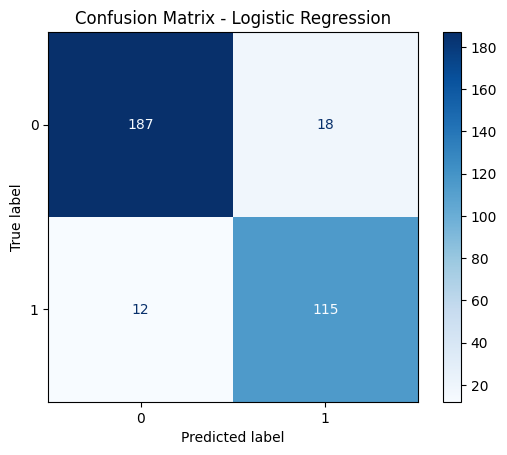

In [9]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
